# Visualization using 3-PCA and t-Distributed Stochastic Neighbouring Entities

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)


# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42) 

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [5]:
import pandas as pd

In [6]:
testData=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/x_train_all.csv')
trainData=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/x_test_all.csv')
trainLabel=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/y_test_all.csv')

In [7]:
testData.keys()

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2294', '2295', '2296', '2297', '2298', '2299', '2300', '2301', '2302',
       '2303'],
      dtype='object', length=2304)

In [8]:
testData.head()
trainData.tail()




,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
3085,112.0,109.0,111.0,116.0,122.0,108.0,91.0,76.0,65.0,54.0,...,68.0,70.0,68.0,66.0,63.0,59.0,55.0,57.0,61.0,66.0
3086,249.0,234.0,247.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,...,26.0,23.0,22.0,23.0,23.0,21.0,18.0,20.0,24.0,23.0
3087,255.0,255.0,255.0,255.0,254.0,234.0,232.0,188.0,255.0,255.0,...,38.0,27.0,33.0,185.0,255.0,255.0,255.0,255.0,255.0,255.0
3088,25.0,28.0,40.0,68.0,169.0,198.0,171.0,142.0,133.0,140.0,...,255.0,255.0,255.0,255.0,251.0,230.0,187.0,155.0,135.0,124.0
3089,52.0,49.0,48.0,59.0,84.0,113.0,100.0,82.0,59.0,77.0,...,52.0,52.0,53.0,54.0,54.0,54.0,57.0,66.0,65.0,62.0


In [9]:
X=np.array(testData)

In [10]:
X[0]

array([78., 77., 76., ..., 98., 95., 94.])

In [11]:
X[99]

array([ 21.,  21.,  22., ..., 141., 121.,  97.])

In [12]:
X[9689]

array([252., 189., 238., ...,  26.,  20.,  17.])

In [13]:
def plot_digit(data):
    image = data.reshape(48, 48)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

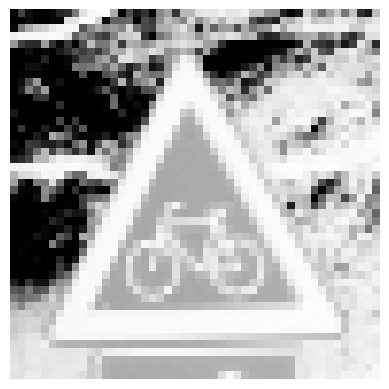

In [14]:
plot_digit(X[9689])

In [15]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 48
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

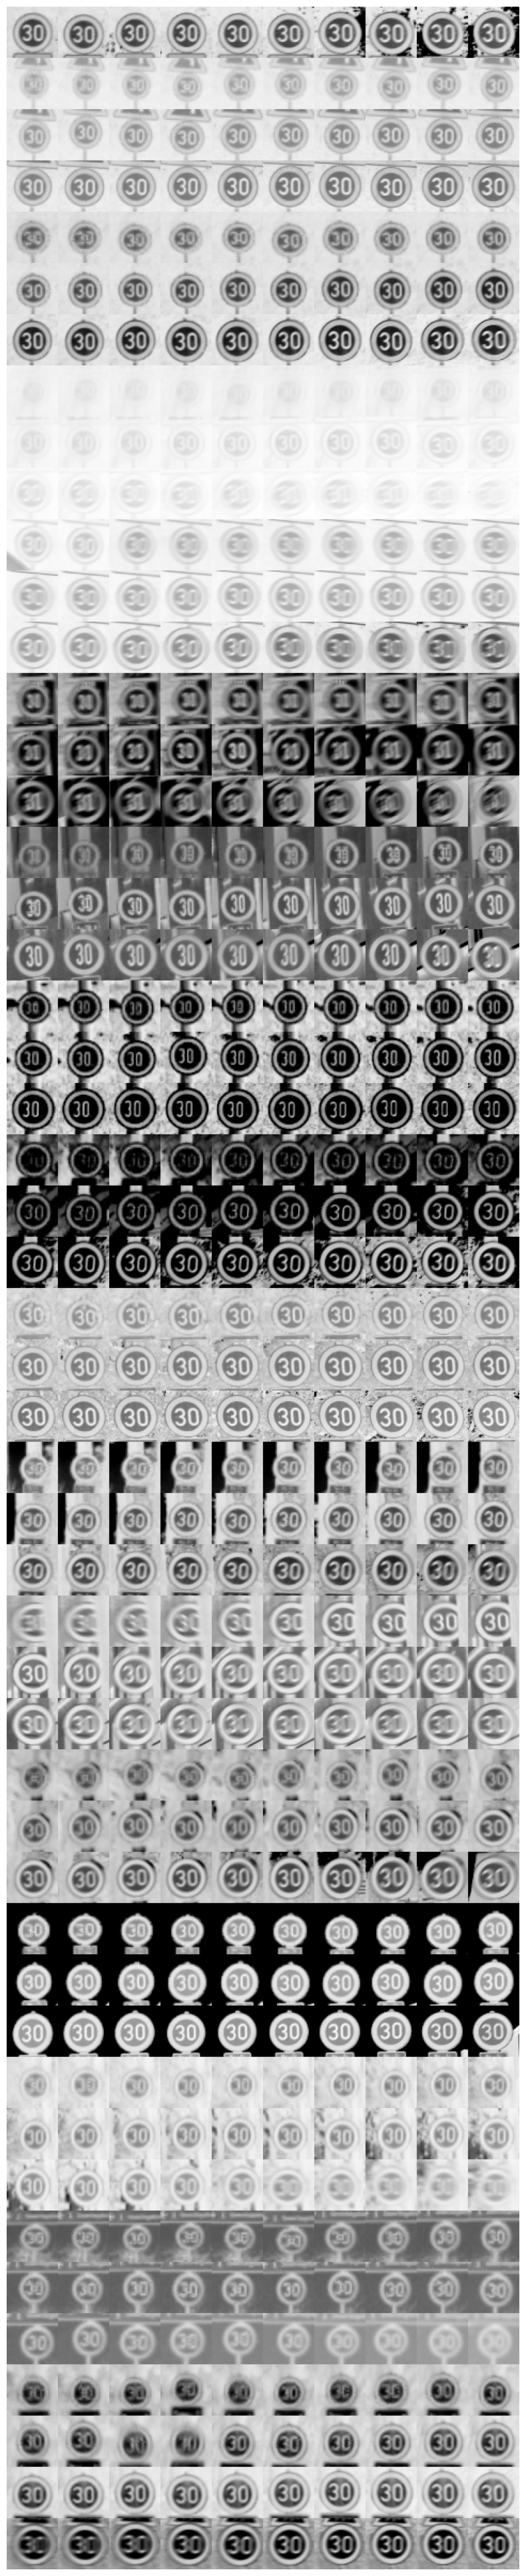

In [16]:
plt.figure(figsize=(50,50))
example_images = X[500:1000]
plot_digits(example_images, images_per_row=10)
plt.show()

In [17]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [18]:
testLabel=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/y_train_all.csv')

In [19]:
testLabel.head()

,0
0,0
1,0
2,0
3,0
4,0


In [20]:
testData.shape

(9690, 2304)

In [21]:
testLabel.shape

(9690, 1)

In [22]:
import matplotlib.pyplot as plt

In [23]:
testData.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [24]:
testData

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,35.0,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,37.0,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,41.0,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,38.0,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0


In [25]:
#row,column
testData.shape

(9690, 2304)

In [26]:
#row,column
testLabel.shape

(9690, 1)

In [27]:
testLabel['0']

0       0
1       0
2       0
3       0
4       0
       ..
9685    9
9686    9
9687    9
9688    9
9689    9
Name: 0, Length: 9690, dtype: int64

In [28]:
testLabel.columns

Index(['0'], dtype='object')

In [29]:
testLabel['0']

0       0
1       0
2       0
3       0
4       0
       ..
9685    9
9686    9
9687    9
9688    9
9689    9
Name: 0, Length: 9690, dtype: int64

In [30]:
len(testLabel['0'].unique())

10

In [31]:
testLabel['0'].value_counts()

2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
Name: 0, dtype: int64

In [32]:
# Save the data points as 'input_data'
input_data = testData.iloc[:,0:] / 255
# Check the shape of the input data
print('Shape of the input data',input_data.shape)
# Preview a few rows
input_data.head()

Shape of the input data (9690, 2304)


,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.305882,0.301961,0.298039,0.321569,0.341176,0.360784,0.407843,0.466667,0.458824,0.470588,...,0.341176,0.309804,0.282353,0.298039,0.325490,0.372549,0.388235,0.384314,0.372549,0.368627
1,0.286275,0.294118,0.309804,0.305882,0.298039,0.294118,0.349020,0.419608,0.521569,0.490196,...,0.376471,0.364706,0.333333,0.301961,0.270588,0.286275,0.325490,0.392157,0.396078,0.396078
2,0.282353,0.294118,0.309804,0.301961,0.317647,0.349020,0.411765,0.427451,0.337255,0.352941,...,0.384314,0.372549,0.345098,0.313725,0.286275,0.278431,0.290196,0.313725,0.349020,0.372549
3,0.262745,0.274510,0.290196,0.313725,0.364706,0.419608,0.431373,0.376471,0.270588,0.392157,...,0.439216,0.360784,0.341176,0.321569,0.301961,0.282353,0.274510,0.282353,0.317647,0.345098
4,0.290196,0.290196,0.286275,0.282353,0.301961,0.341176,0.407843,0.427451,0.329412,0.325490,...,0.392157,0.384314,0.388235,0.392157,0.388235,0.349020,0.305882,0.258824,0.266667,0.282353


In [33]:
input_data['0']

0       0.305882
1       0.286275
2       0.282353
3       0.262745
4       0.290196
          ...   
9685    0.968627
9686    0.592157
9687    1.000000
9688    1.000000
9689    0.988235
Name: 0, Length: 9690, dtype: float64

In [34]:
test=np.array(testData)
test.shape
test[0]

array([78., 77., 76., ..., 98., 95., 94.])

In [35]:
import matplotlib.pyplot as plt

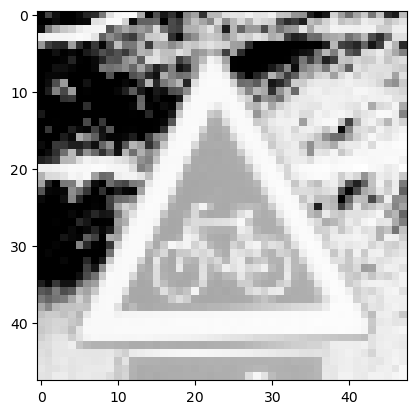

In [36]:
some_digit = testData['0']
some_digit_image = np.array(testData.iloc[9689, :]).reshape(48, 48)
plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.show()

In [37]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [np.array(instance).reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [38]:
plt.figure(figsize=(9,9))
example_images = np.array(testData)
example_images


array([[ 78.,  77.,  76., ...,  98.,  95.,  94.],
       [ 73.,  75.,  79., ..., 100., 101., 101.],
       [ 72.,  75.,  79., ...,  80.,  89.,  95.],
       ...,
       [255., 255., 255., ...,  31.,  39.,  43.],
       [255., 253., 255., ...,  26.,  26.,  24.],
       [252., 189., 238., ...,  26.,  20.,  17.]])

<Figure size 900x900 with 0 Axes>

In [39]:
# Save the label(in 0-9 format) as 'target'
target = testLabel[['0']].iloc[:, :]
# Check the shape of the label/category
print('Shape of the input label', target.shape)
# Preview a few rows
target.head()

Shape of the input label (9690, 1)


,0
0,0
1,0
2,0
3,0
4,0


In [41]:

#Class label Traffic Sign

#0            speed limit 20

#1            speed limit 30

#2            speed limit 50

#3            speed limit 60

#4            speed limit 70

#5            left turn

#6            right turn

#7            beware pedestrian crossing

#8            beware children

#9            beware cycle route ahead

In [42]:
# Manually enter the meaningful name of each label
label = ['speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'left turn', 'right turn', 'beware pedestrian crossing', 'beware children', 'beware cycle route ahead']

In [43]:
label

['speed limit 20',
 'speed limit 30',
 'speed limit 50',
 'speed limit 60',
 'speed limit 70',
 'left turn',
 'right turn',
 'beware pedestrian crossing',
 'beware children',
 'beware cycle route ahead']

In [44]:
target

,0
0,0
1,0
2,0
3,0
4,0
...,...
9685,9
9686,9
9687,9
9688,9


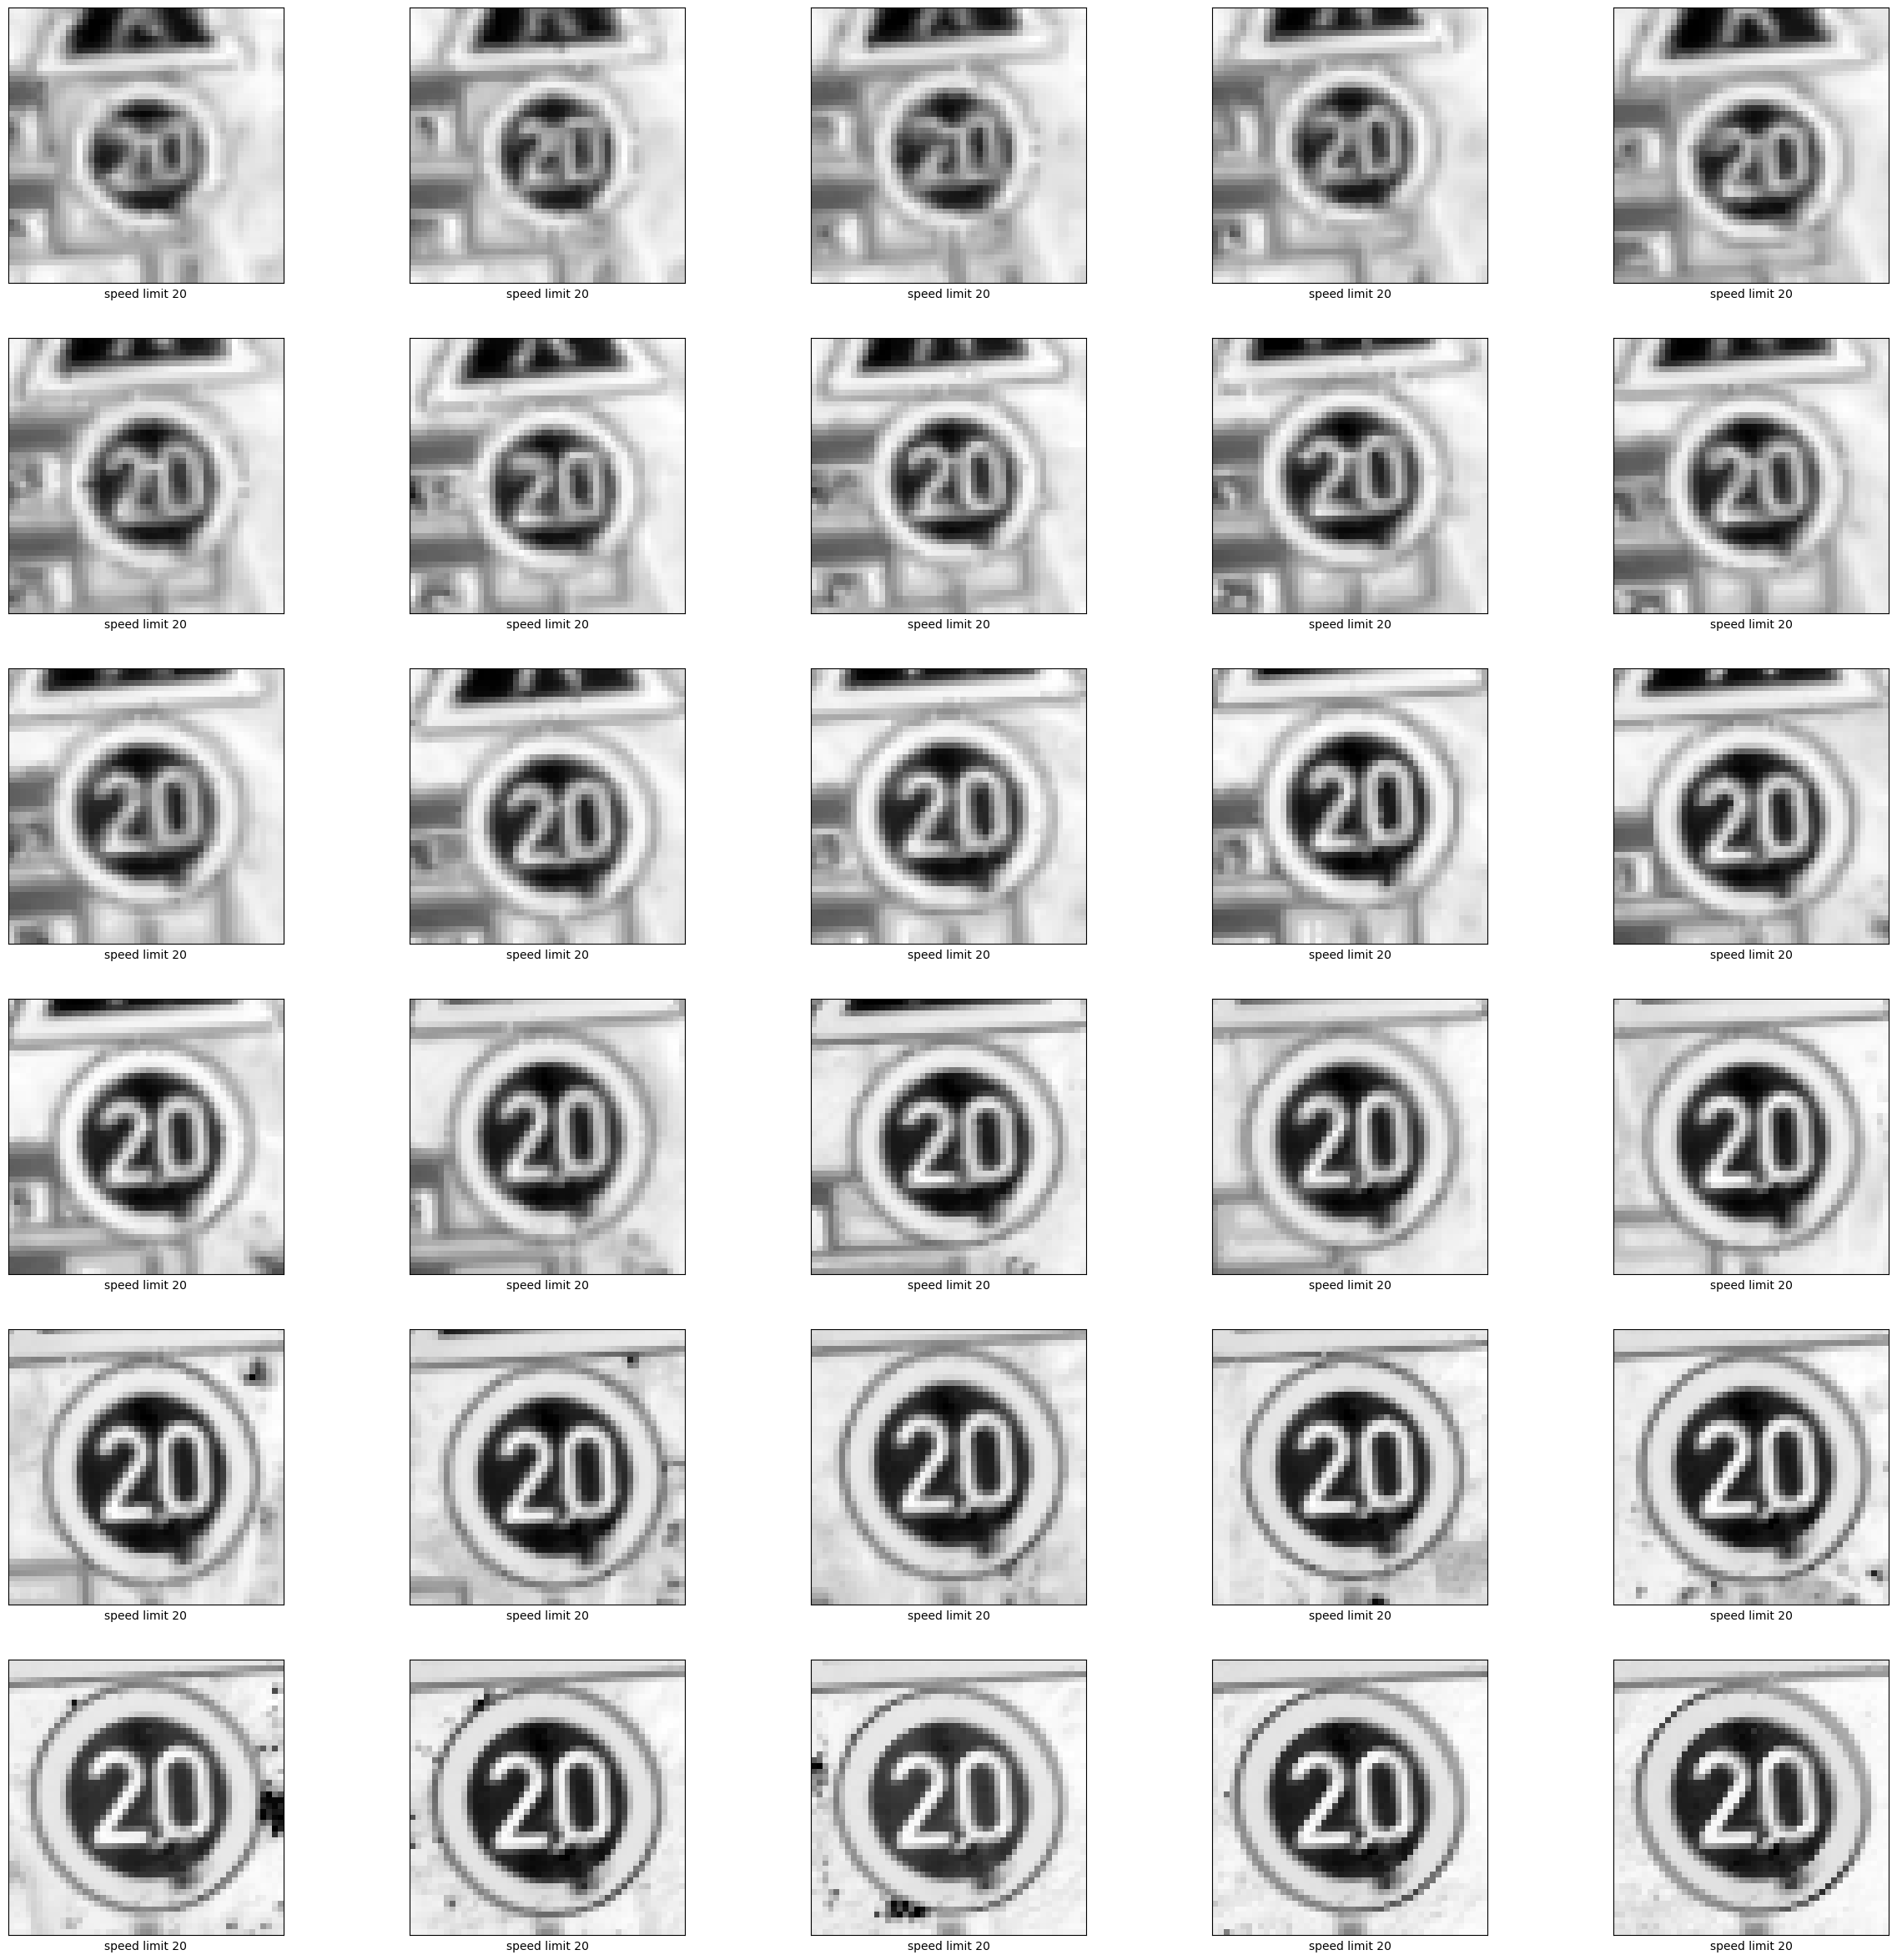

In [45]:
# Set the figure size
plt.figure(figsize=(30,30))
# Show only the first 30 pictures
for i in range(0,30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(testData.iloc[i, :]).reshape(48,48), cmap=plt.cm.binary)
    plt.xlabel(label[target['0'].iloc[0]])

In [46]:
from __future__ import print_function
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [47]:
from __future__ import print_function
import time

In [48]:
from sklearn.datasets import fetch_openml
testData

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,35.0,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,37.0,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,41.0,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,38.0,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0


In [49]:
# Give multiple pixel columns one name: features
features = ['pixel' + str(i+1) for i in range(testData.shape[1]) ]
# Create a new DataFrame df
pca_df = pd.DataFrame(np.array(testData), columns=features)
# Add an additional column 'y', identical with label values in data
pca_df['label'] = target['0']

print('Size of the dataframe: {}'.format(pca_df.shape))
pca_df['label']

Size of the dataframe: (9690, 2305)


0       0
1       0
2       0
3       0
4       0
       ..
9685    9
9686    9
9687    9
9688    9
9689    9
Name: label, Length: 9690, dtype: int64

In [50]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(pca_df.shape[0]):
    # Extract the label for comparison
    if pca_df['label'][i] == 0:
        # Save meaningful label to the results
        results.append('speed limit 20')
    # Following the same code pattern as the one above
    elif pca_df['label'][i] == 1:
        results.append('speed limit 30')
    elif pca_df['label'][i] == 2:
        results.append('speed limit 50')
    elif pca_df['label'][i] == 3:
        results.append('speed limit 60')
    elif pca_df['label'][i] == 4:
        results.append('speed limit 70')
    elif pca_df['label'][i] == 5:
        results.append('left turn')
    elif pca_df['label'][i] == 6:
        results.append('right turn')
    elif pca_df['label'][i] == 7:
        results.append('beware pedestrian crossing')
    elif pca_df['label'][i] == 8:
        results.append('beware children')
    elif pca_df['label'][i] == 9:
        results.append('beware cycle route ahead')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))
# Create a new column named result which has all meaningful results        
pca_df['result'] = results
pca_df['label'] = target['0']
results

['speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limit 20',
 'speed limi

In [51]:
pca_df['result'] 
pca_df['label'] 

0       0
1       0
2       0
3       0
4       0
       ..
9685    9
9686    9
9687    9
9688    9
9689    9
Name: label, Length: 9690, dtype: int64

# Principal Component  Analysis

In [52]:
#Visualize using Principal Component Analysis
# Set first three principle components
pca = PCA(n_components=3)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
pca_result = pca.fit_transform(pca_df[features].values)

In [53]:
pca_df[features].values


array([[ 78.,  77.,  76., ...,  98.,  95.,  94.],
       [ 73.,  75.,  79., ..., 100., 101., 101.],
       [ 72.,  75.,  79., ...,  80.,  89.,  95.],
       ...,
       [255., 255., 255., ...,  31.,  39.,  43.],
       [255., 253., 255., ...,  26.,  26.,  24.],
       [252., 189., 238., ...,  26.,  20.,  17.]])

In [51]:
pca_result

array([[ 1833.67865378,  -327.43228008,  -247.74318825],
       [ 1859.00701879,  -349.97715692,  -192.22227485],
       [ 1764.50988089,  -388.61402427,  -133.03424834],
       ...,
       [  985.8645514 ,  1719.21149184, -1749.45500618],
       [ 1180.69457138,  1818.17852028, -1816.04020711],
       [  564.08876036,  1545.22278043,  -854.69767755]])

In [52]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.49249055 0.17927425 0.04509453]


In [53]:
pca_df['First Dimension'] = pca_result[:,0]
pca_df['Second Dimension'] = pca_result[:,1] 
pca_df['Third Dimension'] = pca_result[:,2]

In [54]:
# Preview the first few rows in the `pca_df` data frame.
pca_df.head()
pca_df.tail()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel2300,pixel2301,pixel2302,pixel2303,pixel2304,label,result,First Dimension,Second Dimension,Third Dimension
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,23.0,22.0,26.0,26.0,27.0,9,beware cycle route ahead,987.795453,1450.984446,-1503.450236
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,30.0,29.0,26.0,28.0,27.0,9,beware cycle route ahead,1017.324304,1511.469231,-1452.548473
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,36.0,39.0,31.0,39.0,43.0,9,beware cycle route ahead,985.864551,1719.211492,-1749.455006
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,28.0,27.0,26.0,26.0,24.0,9,beware cycle route ahead,1180.694571,1818.178520,-1816.040207
9689,252.0,189.0,238.0,255.0,255.0,245.0,219.0,212.0,140.0,40.0,...,23.0,23.0,26.0,20.0,17.0,9,beware cycle route ahead,564.088760,1545.222780,-854.697678


In [55]:
pca_result[:,0]

array([1833.67865378, 1859.00701879, 1764.50988089, ...,  985.8645514 ,
       1180.69457138,  564.08876036])

Text(0.5, 0.98, '3-Component PCA')

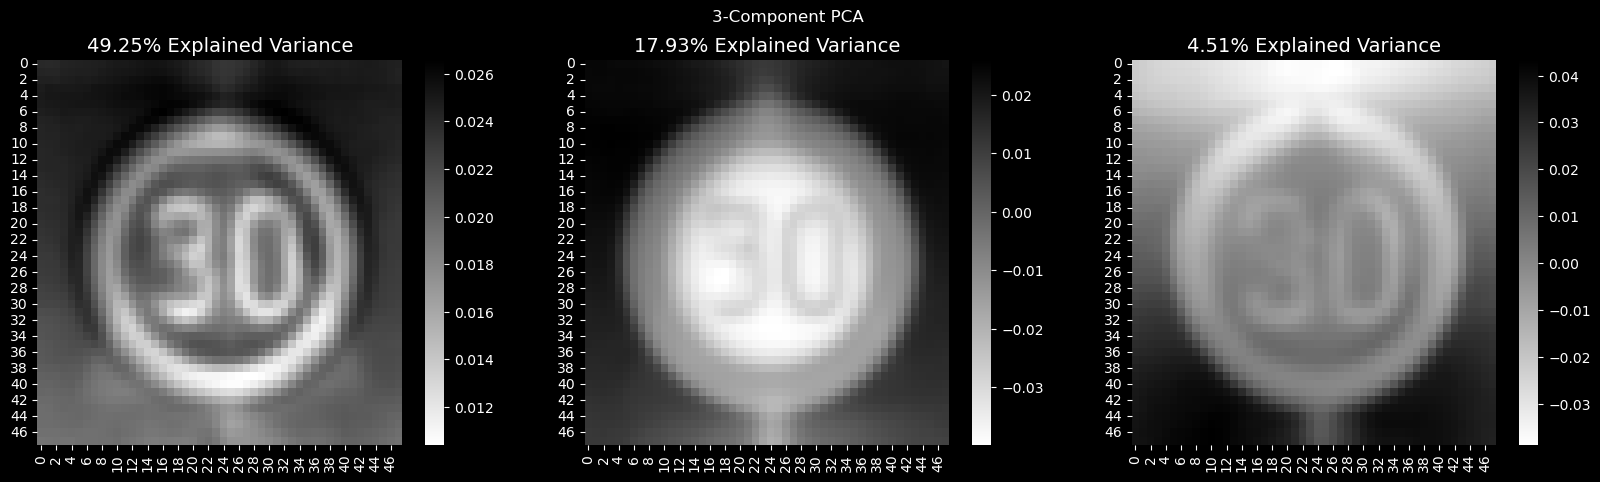

In [56]:
# Set the graph style as 'fivethirtyeight'
plt.style.use('dark_background')
#Set figure size
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
# use seaborn heatmap to visualize the first three pca components
sns.heatmap(pca.components_[0, :].reshape(48, 48), ax=axarr[0], cmap=plt.cm.binary)
sns.heatmap(pca.components_[1, :].reshape(48, 48), ax=axarr[1], cmap=plt.cm.binary)
sns.heatmap(pca.components_[2, :].reshape(48, 48), ax=axarr[2], cmap=plt.cm.binary)
# Set picture title to explained variance
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
axarr[2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize=14)
# Add picture title
plt.suptitle('3-Component PCA')

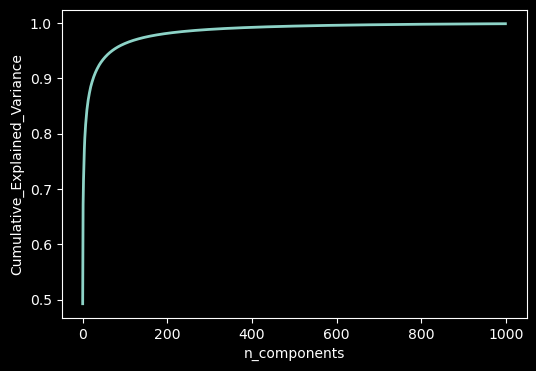

In [57]:
# initializing the pca
# Set n_components as 2304 dimensions
pca = decomposition.PCA(n_components = 1000)
# Fit on training data
pca_784 = pca.fit_transform(pca_df[features].values)
#percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
var_ratios = np.cumsum(pca.explained_variance_ratio_)
# Plot the PCA spectrum
plt.figure(figsize=(6, 4))
plt.plot(var_ratios, linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cumulative_Explained_Variance")
plt.show()

In [58]:
# Set first three principle components
pca = PCA(n_components=10)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
pca_result = pca.fit_transform(pca_df[features].values)

In [59]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.49249055 0.17927425 0.04509453 0.0307741  0.02488491 0.01912609
 0.01323025 0.01174394 0.00942209 0.00914621]


In [60]:
pca_df['Third Dimension'] = pca_result[:,2]
pca_df['Fourth Dimension'] = pca_result[:,3] 
pca_df['Fifth Dimension'] = pca_result[:,4]
pca_df['Sixth Dimension'] = pca_result[:,5]
pca_df['Seventh Dimension'] = pca_result[:,6] 
pca_df['Eighth Dimension'] = pca_result[:,7]
pca_df['Nineth Dimension'] = pca_result[:,8]
pca_df['Tenth Dimension'] = pca_result[:,9] 

In [61]:
pca_df.describe


<bound method NDFrame.describe of       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       78.0    77.0    76.0    82.0    87.0    92.0   104.0   119.0   117.0   
1       73.0    75.0    79.0    78.0    76.0    75.0    89.0   107.0   133.0   
2       72.0    75.0    79.0    77.0    81.0    89.0   105.0   109.0    86.0   
3       67.0    70.0    74.0    80.0    93.0   107.0   110.0    96.0    69.0   
4       74.0    74.0    73.0    72.0    77.0    87.0   104.0   109.0    84.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9685   247.0   220.0   254.0   213.0   129.0   208.0   254.0   255.0   255.0   
9686   151.0   118.0   254.0   255.0   255.0   255.0   254.0   254.0   254.0   
9687   255.0   255.0   255.0   255.0   255.0   255.0   255.0   255.0   255.0   
9688   255.0   253.0   255.0   255.0   255.0   255.0   255.0   255.0   255.0   
9689   252.0   189.0   238.0   255.0   255.0   245.0   219.0   212.0   140.0   

     

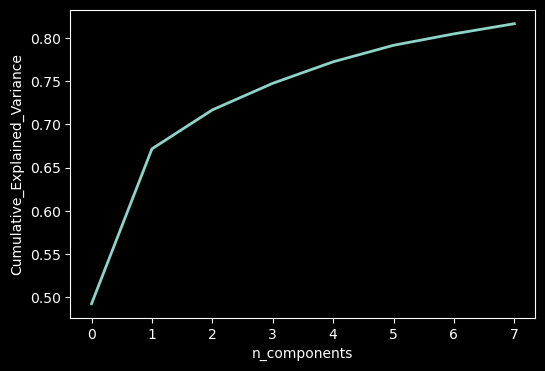

In [62]:

# initializing the pca
# Set n_components as 2304 dimensions
pca = decomposition.PCA(n_components = 8)
# Fit on training data
pca_784 = pca.fit_transform(pca_df[features].values)
#percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
var_ratios = np.cumsum(pca.explained_variance_ratio_)
# Plot the PCA spectrum
plt.figure(figsize=(6, 4))
plt.plot(var_ratios, linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cumulative_Explained_Variance")
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

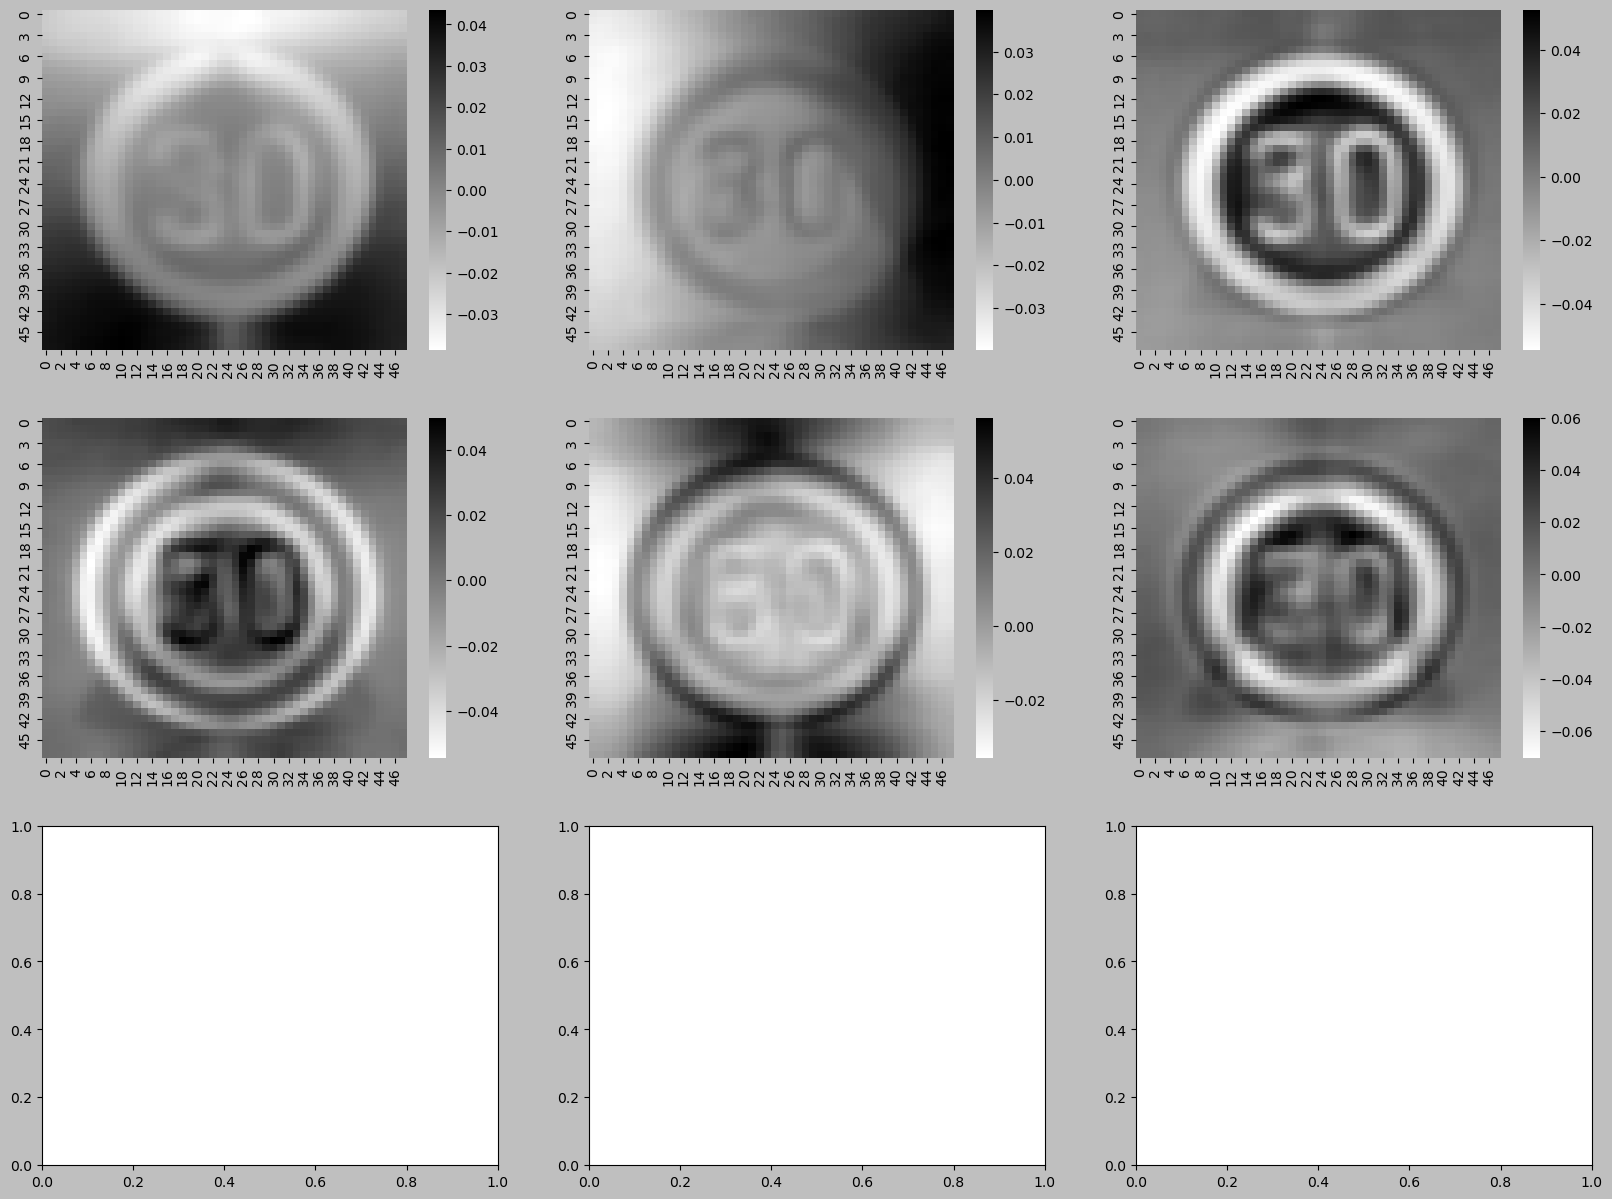

In [63]:
# Set the graph style as 'fivethirtyeight'
plt.style.use('grayscale')
#Set figure size
fig, axarr =  plt.subplots(3, 3, figsize=(20, 15))
# use seaborn heatmap to visualize the first 10 pca components
sns.heatmap(pca.components_[2, :].reshape(48, 48), ax=axarr[0,0], cmap=plt.cm.binary)
sns.heatmap(pca.components_[3, :].reshape(48, 48), ax=axarr[0,1], cmap=plt.cm.binary)
sns.heatmap(pca.components_[4, :].reshape(48, 48), ax=axarr[0,2], cmap=plt.cm.binary)
sns.heatmap(pca.components_[5, :].reshape(48, 48), ax=axarr[1,0], cmap=plt.cm.binary)
sns.heatmap(pca.components_[6, :].reshape(48, 48), ax=axarr[1,1], cmap=plt.cm.binary)
sns.heatmap(pca.components_[7, :].reshape(48, 48), ax=axarr[1,2], cmap=plt.cm.binary)
sns.heatmap(pca.components_[8, :].reshape(48, 48), ax=axarr[2,0], cmap=plt.cm.binary)
sns.heatmap(pca.components_[9, :].reshape(48, 48), ax=axarr[2,1], cmap=plt.cm.binary)

# Set picture title to explained variance
axarr[0,0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize=14)
axarr[0,1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100), fontsize=14)
axarr[0,2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[4]*100), fontsize=14)
axarr[1,0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[5]*100), fontsize=14)
axarr[1,1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[6]*100), fontsize=14)
axarr[1,2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[7]*100), fontsize=14)
axarr[2,0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[8]*100), fontsize=14)
axarr[2,1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[9]*100), fontsize=14)
# Add picture title
plt.suptitle('10-Component PCA')

In [ ]:
plt.style.available

In [ ]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="First Dimension", y="Second Dimension",
    hue = 'result',
    hue_order =['speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'left turn', 'right turn', 'beware pedestrian crossing', 'beware children', 'beware cycle route ahead'],
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

In [ ]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="First Dimension", y="Nineth Dimension",
    hue = 'result',
    hue_order =['speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'left turn', 'right turn', 'beware pedestrian crossing', 'beware children', 'beware cycle route ahead'],
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

In [ ]:
pca
graph = plt.figure(fig.add_subplot(projection = '3d'))
sns.scatter(
    xs=''.join(pca_df["First Dimension"]), 
    ys=''.join(pca_df["Second Dimension"]), 
    zs=''.join(pca_df["Third Dimension"]), 
    c=pca_df["label"], 
    #cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

In [ ]:
pcax=''.join(pca_df)

In [ ]:
pcax

In [ ]:
xs=pca_df[0:200],

In [ ]:
xs

In [ ]:
pca_df["First Dimension"]

In [ ]:
pca_df["First Dimension"]

In [ ]:
pca_df["Second Dimension"]

In [ ]:
graph = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
graph.scatter(
    xs=pca_df["First Dimension"], 
    ys=pca_df["Second Dimension"], 
    zs=pca_df["Third Dimension"], 
    c=pca_df["label"], 
    cmap='tab10'
)
# Make legend, set axes limits and labels
graph.legend()
graph.set_xlim(0, 3000)
graph.set_ylim(0,3000)
graph.set_zlim(0, 3000)
graph.set_xlabel('X')
graph.set_ylabel('Y')
graph.set_zlabel('Z')
graph.view_init(elev=50., azim=-100, roll=1)
plt.show()

In [ ]:
pca_df["label"]

In [ ]:
graph = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
graph.scatter(
    xs=pca_df["First Dimension"], 
    ys=pca_df["Second Dimension"], 
    zs=pca_df["Third Dimension"], 
    c=pca_df["label"], 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

# #Visualize using t-Distributed Stochastic Neighbouring Entities

In [ ]:
#Visualize using t-Distributed Stochastic Neighbouring Entities
# Create a random generator, so to decreases potential biases in the data
rand = np.random.permutation(pca_df.shape[0])

In [ ]:
# Pull 10000 pictures out of the sample
N = 10000
pca_df_subset = pca_df.loc[rand[:N],:].copy()
data_subset = pca_df_subset[features].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
pca_df_subset['First Dimension'] = pca_result[:,0]
pca_df_subset['Second Dimension'] = pca_result[:,1] 
pca_df_subset['Third Dimension'] = pca_result[:,2]
print('Explained variation in each principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
# Keep track of time elapsed in the method
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE finished! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
pca_df_subset['t-SNE First Dimension'] = tsne_results[:,0]
pca_df_subset['t-SNE Second Dimension'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="t-SNE First Dimension", y="t-SNE Second Dimension",
    hue = 'result',
    hue_order =['speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'left turn', 'right turn', 'beware pedestrian crossing', 'beware children', 'beware cycle route ahead'],
    palette=sns.color_palette("hls", 10),
    data=pca_df_subset,
    legend="full",
    alpha=0.3
)

In [ ]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
def naivebayes(train, train_lb, test, test_lb, smoothing):
        n_class = np.unique(train_lb)
        tr = train
        te = test
        tr_lb = train_lb
        te_lb = test_lb
        smoothing = smoothing
        st = time()
        m, s, prior, count = [], [], [], []
        for i, val in enumerate(n_class):
            sep = [tr_lb == val] 
            count.append(len(tr_lb[sep]))
            prior.append(len(tr_lb[sep]) / len(tr_lb))
            m.append(np.mean(tr[sep], axis=0))
            s.append(np.std(tr[sep], axis=0))
        
        pred = []
        likelihood = []
        #prtab = []
        lcs = []
        for n in range(len(te_lb)):
            classifier = []
            sample = te[n] #test sample
            ll = []
            for i, val in enumerate(n_class):
                m1 = m[i]
                var = np.square(s[i]) + smoothing
                prob = 1 / np.sqrt(2 * np.pi * var) * np.exp(-np.square(sample - m1)/(2 * var))
                #prtab.append(prob)
                result = np.sum(np.log(prob))
                classifier.append(result)
                ll.append(prob)

            pred.append(np.argmax(classifier))
            likelihood.append(ll)
            lcs.append(classifier)
        
        return pred, likelihood

In [ ]:
def error_rate(confusion_matrix):
    a = confusion_matrix
    b = a.sum(axis=1)
    df = []
    for i in range(0,10):
        temp = 1-a[i][i]/b[i]
        df.append(temp)
    
    df = pd.DataFrame(df)
    df.columns = ['% Error rate']
    return df*100